In [1]:
from mpl_toolkits import mplot3d

In [24]:
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import numpy as np

from matplotlib.animation import FuncAnimation
from matplotlib.path import Path
from matplotlib import rc

import json
from collections import defaultdict

In [3]:
itemGamma = np.load('data/complete_itemGamma.npy').item()
with open('data/items_meta_data.json', 'r') as data:
    games_dict = json.load(data)

In [4]:
genres = set()
for game in games_dict.values():
    if 'genres' in game:
        for genre in game['genres']:
            genres.add(genre)
genres

{'Accounting',
 'Action',
 'Adventure',
 'Animation &amp; Modeling',
 'Audio Production',
 'Casual',
 'Design &amp; Illustration',
 'Early Access',
 'Education',
 'Free to Play',
 'Indie',
 'Massively Multiplayer',
 'Photo Editing',
 'RPG',
 'Racing',
 'Simulation',
 'Software Training',
 'Sports',
 'Strategy',
 'Utilities',
 'Video Production',
 'Web Publishing'}

In [5]:
items = list(itemGamma.keys())

In [6]:
itemGamma = np.vstack([ x for x in itemGamma.values()])

In [36]:
pca = PCA(n_components=2)

In [37]:
pca.fit(itemGamma)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [38]:
pca.explained_variance_ratio_

array([0.12032078, 0.10168586])

In [39]:
itemGamma_pca = pca.transform(itemGamma)
itemGamma_pca.shape

(10978, 2)

In [45]:
def plotItems(graph, data):
    for index, item in enumerate(items):
        color = 'pink'
        if 'genres' in games_dict[item]:
            genres = games_dict[item]['genres']
            if 'Massively Multiplayer' in genres:
                color = 'red'
            elif 'RPG' in genres:
                color = 'cyan'
            elif 'Sports' in genres:
                color = 'blue'
            elif 'Action' in genres or 'Adventure' in genres:
                color = 'orange'
            elif 'Simulation' in genres:
                color = 'black'
            elif 'Strategy' in genres:
                color = 'green'
            elif 'Racing' in genres:
                color = 'yellow'
            else:
                color = 'pink'

            graph(*data[index].T, c=color, s=2);

    plt.show()

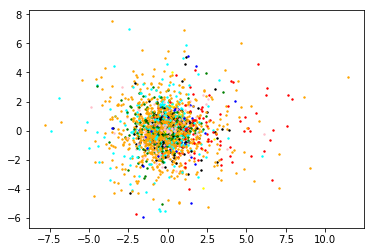

interactive(children=(IntSlider(value=10, description='dist', max=10), Output()), _dom_classes=('widget-intera…

In [47]:
fig, ax = plt.subplots()
plotItems(ax.scatter, itemGamma_pca)

from ipywidgets import interact

@interact(dist=(0, 10, 1))
def update(dist=10):
    ax.dist = dist
    display(fig)

In [25]:
tsne = TSNE(n_components=2, n_iter=5000)

In [26]:
itemGamma_tsne = tsne.fit_transform(itemGamma)

In [27]:
tsne.kl_divergence_

2.826956272125244

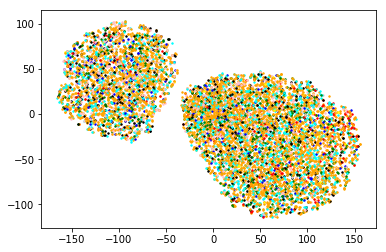

In [46]:
fig, ax = plt.subplots()

plotItems(ax.scatter, itemGamma_tsne)